In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 3 notebook

In [59]:
## Load posterior mean dataframe
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))
print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))
print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

mpl.rcParams.update({'font.size': 16})

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 3A: Dependence of intermeal interval on stomach fullness at meal termination (show data and model?)

vehicle_0.0_A_D


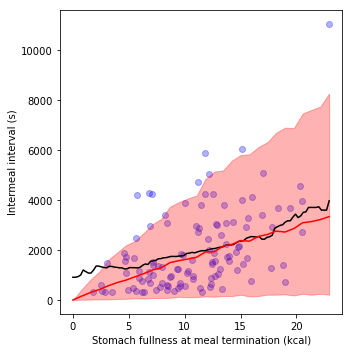

LiCl_32.0_A_D


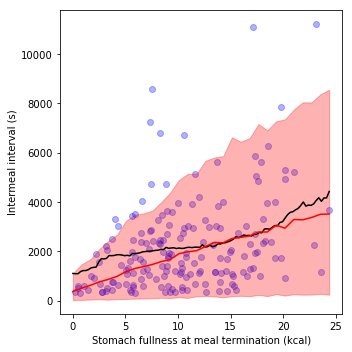

PYY_7.5_A_D


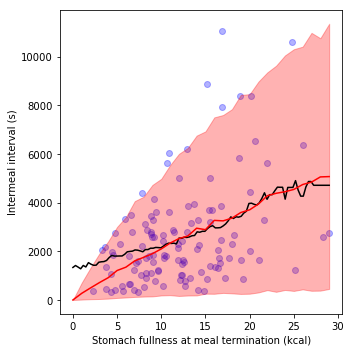

GLP-1_300.0_A_D


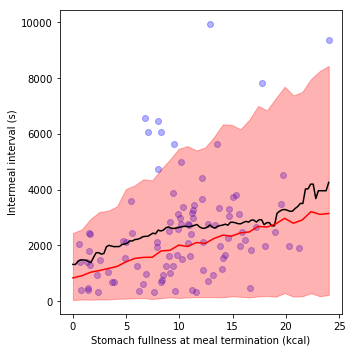

PYY_300.0_A_D


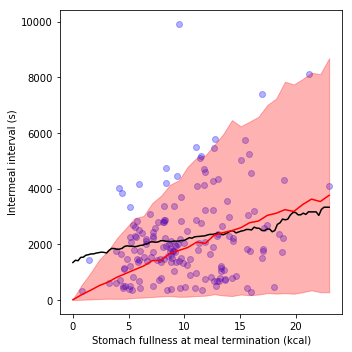

sib_0.9_A_D


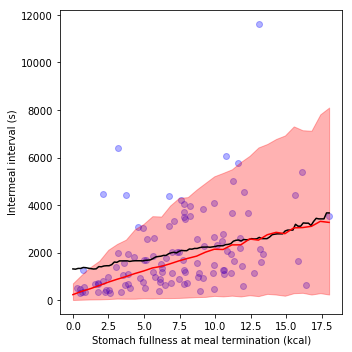

saline_0.0_R_L
Error in saline_0.0_R_L_4_10_2015-11-23.B0104.CSV, IMI of 20587


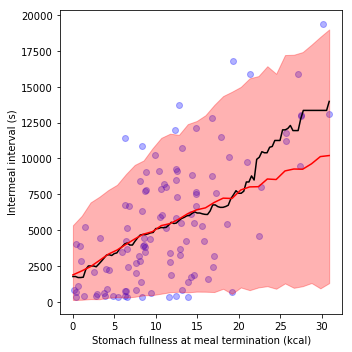

LiCl_64.0_R_L


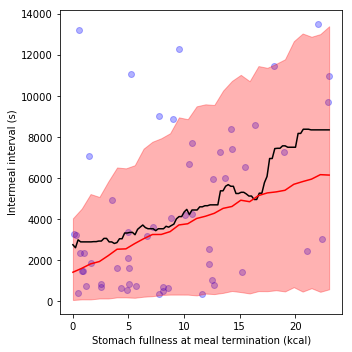

PYY_1.5_R_L


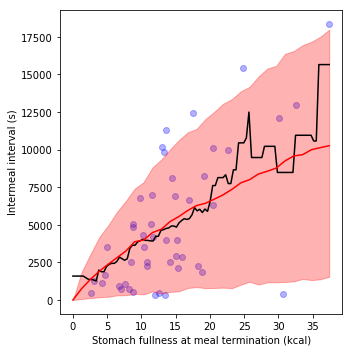

Ex-4_0.3_A_D


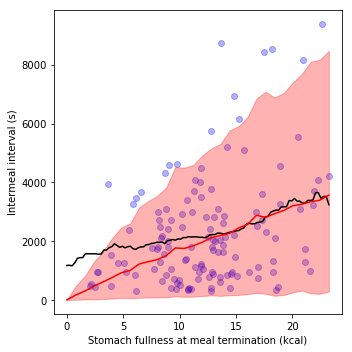

PYY_7.5_R_L


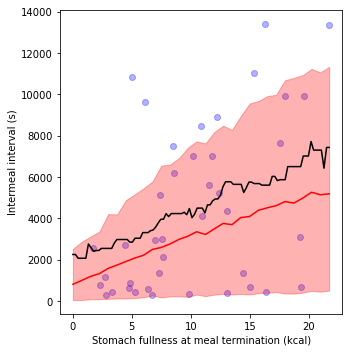

Lep_2.0_A_D


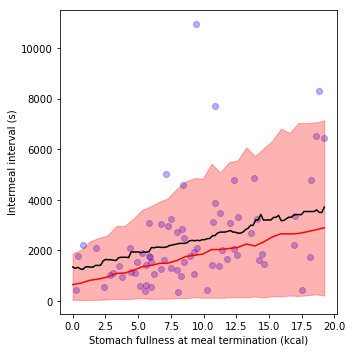

LiCl_32.0_R_L
Error in LiCl_32.0_R_L_5_8_2014-11-03.B0105.CSV, IMI of 29468


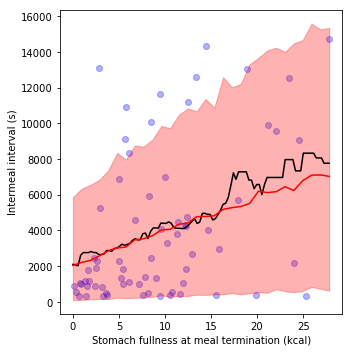

saline_0.0_R_D


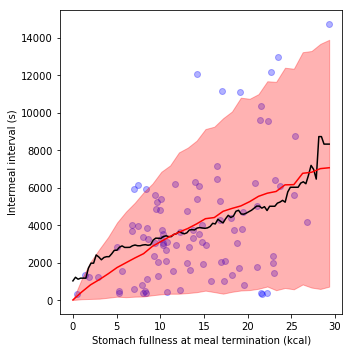

saline_0.0_A_D


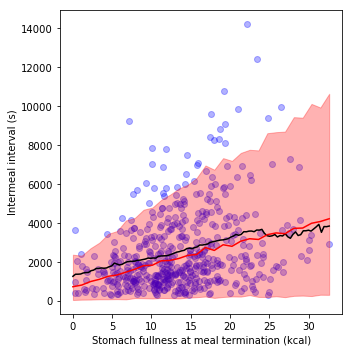

GLP-1_100.0_A_D


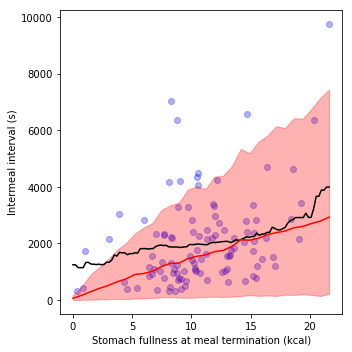

saline_0.0_A_L
Error in saline_0.0_A_L_15_20_2015-11-23.B0115.CSV, IMI of 21444
Error in saline_0.0_A_L_15_20_2015-11-23.B0115.CSV, IMI of 21072
Error in saline_0.0_A_L_11_20_2015-11-23.B0111.CSV, IMI of 20122


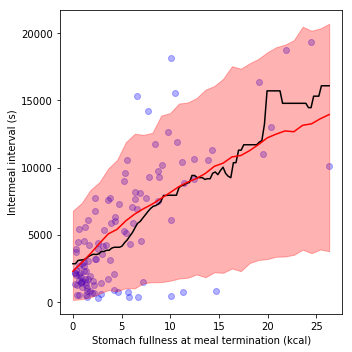

PYY_1.5_A_D


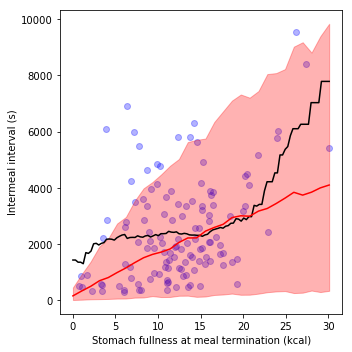

GLP-1_30.0_A_D


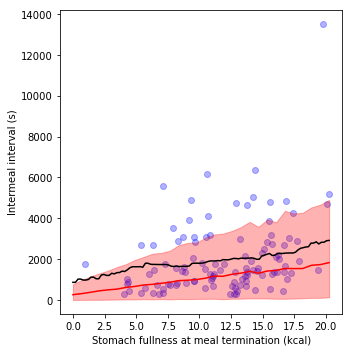

PYY_300.0_R_L


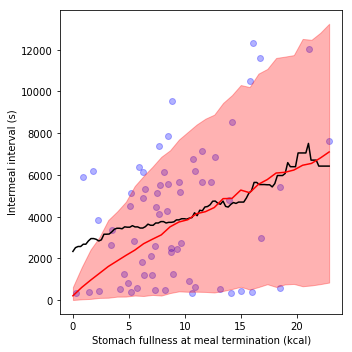

In [3]:
reload(plots)
reload(helpers)

root_dir = 'new_all_data/'
cutoff = 300
num_samples = 1000
windowsize = 5

for i in os.listdir(root_dir):
    print i
    try:
        data_dir = root_dir + i + '/'
        fig, axes = plots.plot_IMI(data_dir, 
                                   group_dict, 
                                   cutoff=cutoff, 
                                   num_samples=num_samples,
                                   windowsize=windowsize)
        
        axes.set_xlabel('Stomach fullness at meal termination (kcal)')
        axes.set_ylabel('Intermeal interval (s)')
        
    except KeyError:
        continue
        
        
    ## Save figure
    fig.tight_layout()
    figname = 'figures/3A_%s.svg' %(i)
    plt.savefig(figname)
    
    plt.show()

## Figure 3B: Satiety ratio predictions are wrong for multiple reasons

vehicle_0.0_A_D
349.858501588


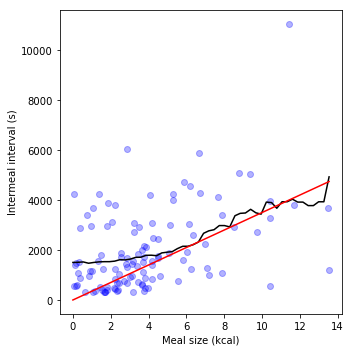

LiCl_32.0_A_D
672.799376573


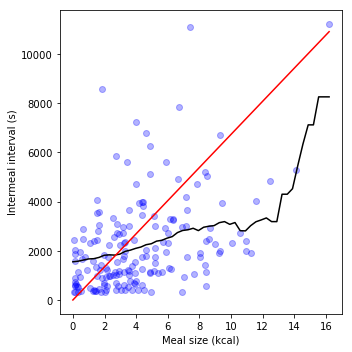

PYY_7.5_A_D
376.204025823


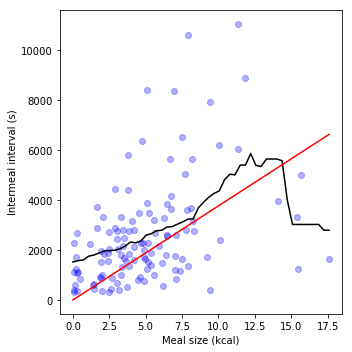

GLP-1_300.0_A_D
761.151066606


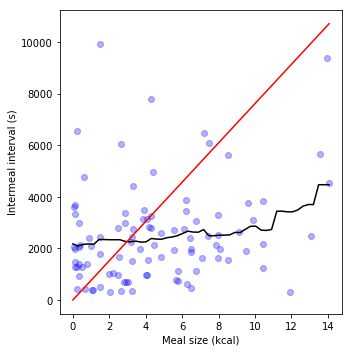

PYY_300.0_A_D
305.363085426


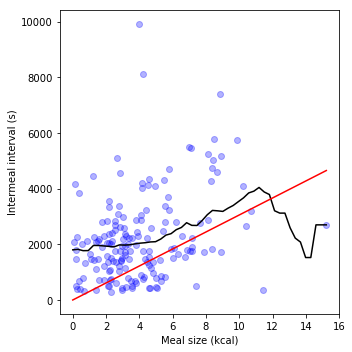

sib_0.9_A_D
1094.57248987


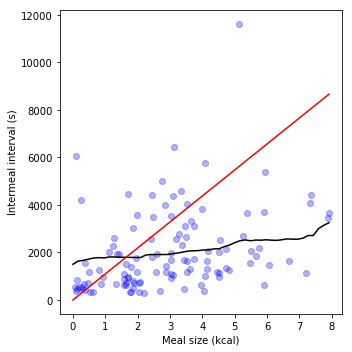

saline_0.0_R_L
Error in saline_0.0_R_L_4_10_2015-11-23.B0104.CSV, IMI of 20587
877.495486128


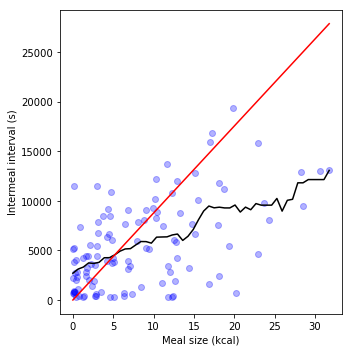

LiCl_64.0_R_L
5430.60920761


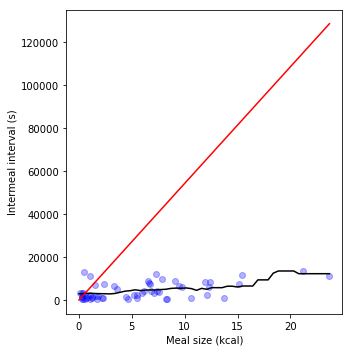

PYY_1.5_R_L
199.797765605


/home/tmm13/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


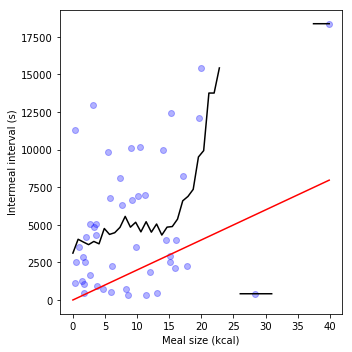

Ex-4_0.3_A_D
724.444959909


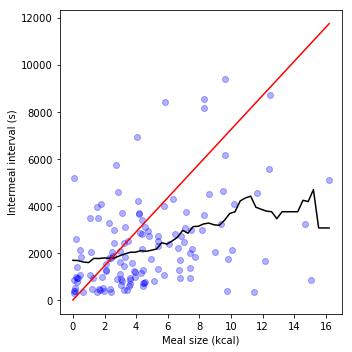

PYY_7.5_R_L
131.595292477


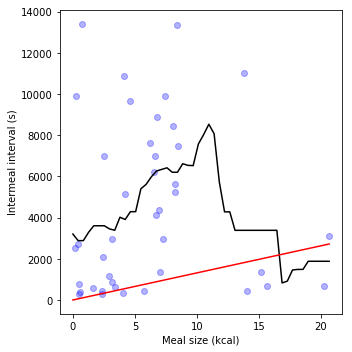

Lep_2.0_A_D
3268.43503192


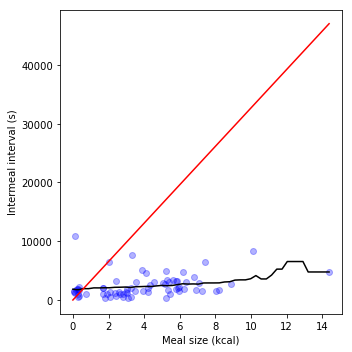

LiCl_32.0_R_L
Error in LiCl_32.0_R_L_5_8_2014-11-03.B0105.CSV, IMI of 29468
1402.27906308


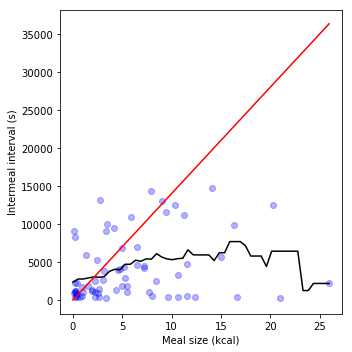

saline_0.0_R_D
4872.84578516


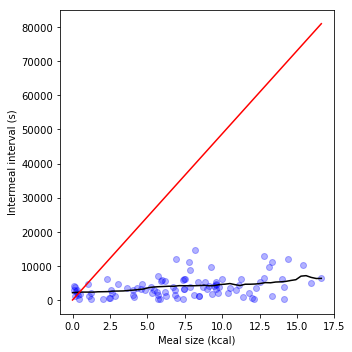

saline_0.0_A_D
2474.43746635


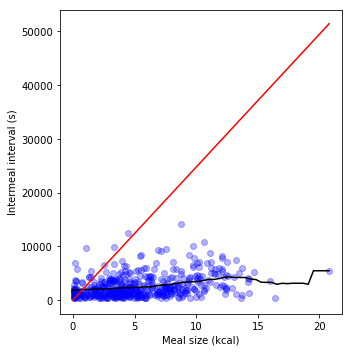

GLP-1_100.0_A_D
903.114172488


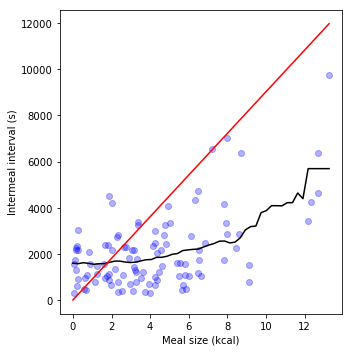

saline_0.0_A_L
Error in saline_0.0_A_L_15_20_2015-11-23.B0115.CSV, IMI of 21444
Error in saline_0.0_A_L_15_20_2015-11-23.B0115.CSV, IMI of 21072
Error in saline_0.0_A_L_11_20_2015-11-23.B0111.CSV, IMI of 20122
16006.3538743


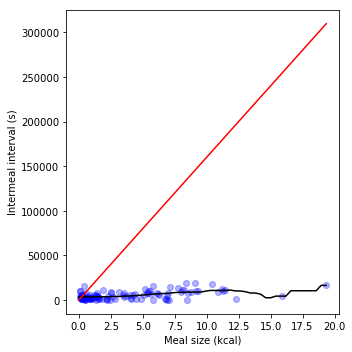

PYY_1.5_A_D
1736.49225135


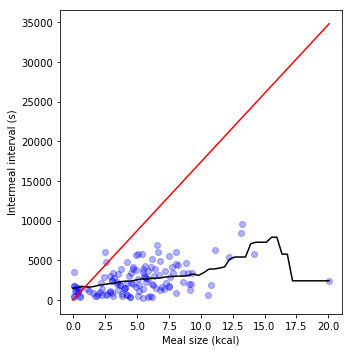

GLP-1_30.0_A_D
498.860625366


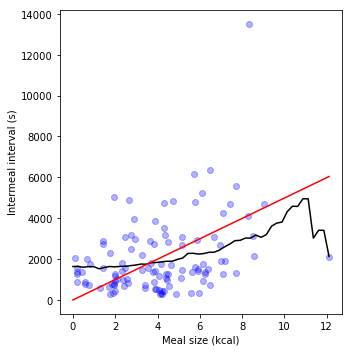

PYY_300.0_R_L
309.236533945


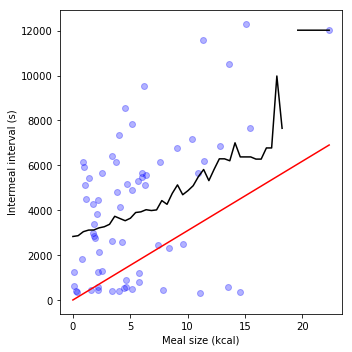

In [4]:
reload(helpers)
reload(plots)

root_dir = 'new_all_data/'
cutoff = cutoff # use previous value
windowsize = 3

for i in os.listdir(root_dir):
    print i
    data_dir = root_dir + i + '/'
    fig, axes = plots.plot_satiety_ratio(data_dir, 
                                         cutoff=cutoff,
                                         windowsize=windowsize)
    axes.set_xlabel('Meal size (kcal)')
    axes.set_ylabel('Intermeal interval (s)')
    
    ## Save figure
    fig.tight_layout()
    figname = 'figures/3B_%s.svg' %(i)
    plt.savefig(figname)
    
    plt.show()

## Figure 3C: Comparison between predicted and true intermeal interval using group satiety ratio, group posterior, and individual posterior data

In [4]:
reload(plots)
reload(helpers)

fig, axes = plots.intake_fullness(df, cutoff=300)

## Save figure
fig.tight_layout()
plt.savefig('figures/3C.svg')

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'autoscale_None'

## Figure 3D/E: Individual posterior mean values of stomach dependent and stomach independent intermeal interval parameters coloured by (D) treatment group and (E) normalised food intake

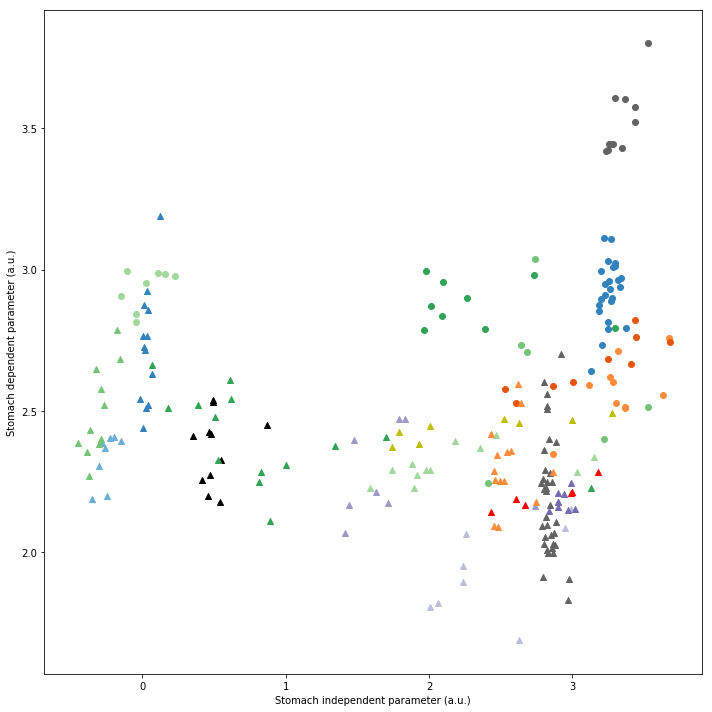

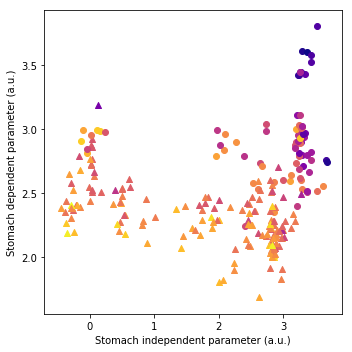

In [4]:
reload(plots)
reload(helpers)

fig, axes = plots.pairplot(df, 'theta7', 'theta8', ctype='drug_c', figsize=(10,10))
axes.set_xlabel('Stomach independent parameter (a.u.)')
axes.set_ylabel('Stomach dependent parameter (a.u.)')

## Save figure
fig.tight_layout()
plt.savefig('figures/3D.svg')

fig2, axes2 = plots.pairplot(df, 'theta7', 'theta8', ctype='rate_c')
axes2.set_xlabel('Stomach independent parameter (a.u.)')
axes2.set_ylabel('Stomach dependent parameter (a.u.)')

## Save figure
fig2.tight_layout()
plt.savefig('figures/3E.svg')

plt.show()

## Colourbar

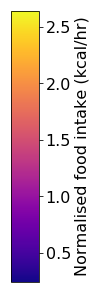

In [62]:
cmap = mpl.cm.plasma

feeding_amts = df['rate']
feed_min = np.min(feeding_amts)
feed_max = np.max(feeding_amts)

norm = mpl.colors.Normalize(vmin=feed_min, vmax=feed_max)

fig, axes = plt.subplots(1, figsize=(0.5,5))

cb1 = mpl.colorbar.ColorbarBase(axes, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

cb1.set_label('Normalised food intake (kcal/hr)')

plt.savefig('figures/colorbar.svg')

plt.show()

## Legend

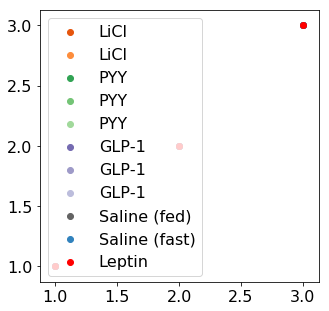

In [61]:
fig, axes = plt.subplots(1, figsize=(5,5))

drugs = df['drug'].unique()

for drug in drugs:
    if drug == 'saline':
        
        ## Adlib
        displaytext = 'Saline (fed)'
        dose = 0.0
        recover = 'A'
        period = 'L'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        ## Refeeding
        displaytext = 'Saline (fast)'
        dose = 0.0
        recover = 'R'
        period = 'L'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    elif drug == 'PYY':
        displaytext = 'PYY'
        dose = 300.0
        recover = 'A'
        period = 'D'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 7.5
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 1.5
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    elif drug == 'GLP-1':
        displaytext = 'GLP-1'
        dose = 300.0
        recover = 'A'
        period = 'D'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 100.0
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 30.0
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    elif drug == 'LiCl':
        displaytext = 'LiCl'
        dose = 64.0
        recover = 'A'
        period = 'D'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
        dose = 32.0
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    elif drug == 'Lep':
        displaytext = 'Leptin'
        dose = 2.0
        recover = 'A'
        period = 'D'
        data = [drug, dose, recover, period]
        c = helpers.get_colour(data)
        axes.scatter([1,2,3],[1,2,3], c=c, label=displaytext)
        
    else:
        continue

axes.legend(numpoints=3, fancybox=True, loc=2)

plt.savefig('figures/legend.svg')

plt.show()